In [11]:
import numpy as np

# scipy.special for the sigmoid function expit()
from scipy.special import expit

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [12]:
# helper to load data from PNG image files
import scipy.misc

# glob helps select multiple files using patterns
import glob

In [13]:
np.random.seed(42)

In [14]:
# neural network class definition
class NeuralNetwork:
    
    # initialize the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        
        # learning rate
        self.lr = learning_rate
        
        # link weight matrices, wih(Weight for input_hidden) and who(Weight for hidden_output)
        # weight inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))  # hnodes x inodes matrix
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))  # onodes x hnodes matrix
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: expit(x)
        
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T   # inodes x 1 vector
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        # X_hidden = W_input_hidden * I
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        # O_hidden = sigmoid(X_hidden)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final ouput layer
        # X_output = W_hidden_output * O_hidden
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        # O_output = sigmoid(X_output)
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weight for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weight for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T   # inodes x 1 vector
        
        # calculate signals into hidden layer
        # X_hidden = W_input_hidden * I
        hidden_inputs = np.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        # O_hidden = sigmoid(X_hidden)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final ouput layer
        # X_output = W_hidden_output * O_hidden
        final_inputs = np.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        # O_output = sigmoid(X_output)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [15]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [16]:
# load the mnist training data csv file into a list
with open('mnist_dataset/mnist_train.csv') as fobj:
    training_data_list = fobj.readlines()

In [17]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')

        # scale and shift the inputs [0.01, 1]
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01

        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99

        # train the neural network
        n.train(inputs, targets)    

In [34]:
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    print("loading ... ", image_file_name)
    
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    img_array = scipy.misc.imread(image_file_name, flatten=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data = 255.0 - img_array.reshape(784)
    
    # then scale data to range [0.01, 1.0]
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    # append label and image data to test data set
    record = np.append(label, img_data)
    
    our_own_dataset.append(record)

loading ...  my_own_images\2828_my_own_2.png
loading ...  my_own_images\2828_my_own_3.png
loading ...  my_own_images\2828_my_own_4.png
loading ...  my_own_images\2828_my_own_5.png
loading ...  my_own_images\2828_my_own_6.png


C:\Users\yuanm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


In [35]:
# test the neural network with our own images
def test(item):
    # plot image
    plt.imshow(our_own_dataset[item][1:].reshape((28, 28)), cmap='Greys', interpolation='None')

    # correct answer is first value
    correct_label = our_own_dataset[item][0]

    # data is remaining values
    inputs = our_own_dataset[item][1:]

    # query the network
    outputs = n.query(inputs)
    print(outputs)

    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    print("network say ", label)

    # append correct or incorrect to list
    if (label == correct_label):
        print("match!")
    else:
        print("no match!")

[[3.27797417e-03]
 [6.37289342e-03]
 [7.53418299e-01]
 [1.15119396e-02]
 [1.10294581e-02]
 [1.00148704e-02]
 [6.91892333e-05]
 [2.16198550e-02]
 [2.23462602e-04]
 [6.90258346e-03]]
network say  2
match!


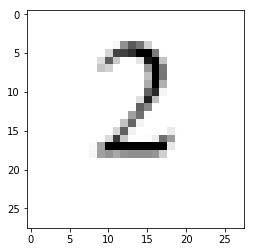

In [36]:
test(0)

[[3.22390819e-03]
 [1.29912305e-02]
 [4.76694264e-03]
 [8.43212126e-01]
 [1.09652951e-03]
 [9.21263745e-02]
 [3.00241564e-03]
 [3.74312817e-03]
 [5.57076344e-04]
 [1.55479089e-03]]
network say  3
match!


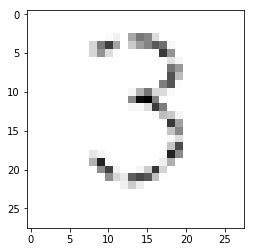

In [37]:
test(1)

[[3.61619418e-04]
 [4.43464708e-03]
 [2.09644637e-02]
 [2.88093614e-04]
 [8.35830638e-01]
 [2.18613566e-02]
 [4.02938982e-02]
 [1.39132439e-02]
 [1.20503757e-04]
 [1.30433961e-03]]
network say  4
match!


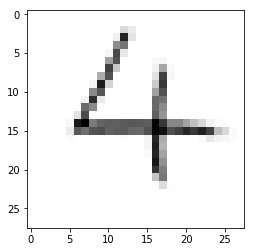

In [38]:
test(2)

[[1.07722062e-03]
 [6.92215658e-04]
 [8.04446131e-04]
 [2.79747107e-02]
 [3.50849293e-04]
 [9.73933090e-01]
 [4.75619344e-03]
 [8.02017558e-03]
 [6.06862278e-04]
 [5.32054478e-03]]
network say  5
match!


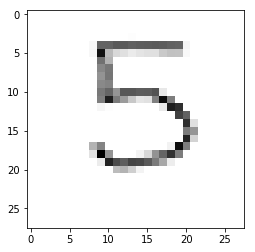

In [39]:
test(3)

[[0.1989342 ]
 [0.11215461]
 [0.12854807]
 [0.11394589]
 [0.04109289]
 [0.27988069]
 [0.41279367]
 [0.04230193]
 [0.15928328]
 [0.31302947]]
network say  6
match!


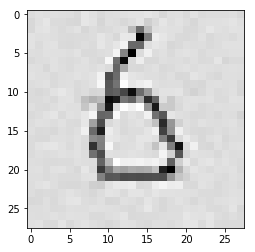

In [40]:
test(4)